In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

In [17]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean, minkowski, cityblock

df = pd.read_csv("PersonalData.csv")

df.columns = df.columns.str.strip()

df_num = df.select_dtypes(include=[np.number])


In [18]:
A = df_num.iloc[0]
B = df_num.iloc[1]

In [19]:
dist_euclid = euclidean(A, B)
print("Odległość euklidesowa:", dist_euclid)

Odległość euklidesowa: 30.604574821421714


In [20]:
df_scaled = df_num.copy()

df_scaled["Zarobki (tys.)"] = df_scaled["Zarobki (tys.)"] * 1000

A_scaled = df_scaled.iloc[0]
B_scaled = df_scaled.iloc[1]

dist_euclid_scaled = euclidean(A_scaled, B_scaled)

print("Odległość euklidesowa po zmianie skali:", dist_euclid_scaled)


Odległość euklidesowa po zmianie skali: 800.5847862656397


In [21]:
df_std = df_num / df_num.std()

A_std = df_std.iloc[0]
B_std = df_std.iloc[1]

dist_euclid_std = euclidean(A_std, B_std)

print("Odległość euklidesowa po standaryzacji:", dist_euclid_std)


Odległość euklidesowa po standaryzacji: 4.0


In [22]:
dist_manhattan = cityblock(A, B)
print("Odległość Manhattan:", dist_manhattan)


Odległość Manhattan: 68.8


In [23]:
dist_minkowski = minkowski(A, B, p=3)
print("Odległość Minkowskiego (p=3):", dist_minkowski)


Odległość Minkowskiego (p=3): 24.524624416199366


## Zadanie 2

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [25]:
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 24.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [26]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
film1 = "kosmiczna stacja astronauta planeta obca"
film2 = "astronauta rakieta księżyc misja kosmiczna"
film3 = "wampir zamek noc krew mroczny"

corpus = [film1, film2, film3]


In [28]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)

print("Słownik:")
print(vectorizer.get_feature_names_out())

df_vectors = pd.DataFrame(X.toarray(), 
                          columns=vectorizer.get_feature_names_out(),
                          index=["film1", "film2", "film3"])

print("\nReprezentacja wektorowa:")
print(df_vectors)


Słownik:
['astronauta' 'kosmiczna' 'krew' 'księżyc' 'misja' 'mroczny' 'noc' 'obca'
 'planeta' 'rakieta' 'stacja' 'wampir' 'zamek']

Reprezentacja wektorowa:
       astronauta  kosmiczna  krew  księżyc  misja  mroczny  noc  obca  \
film1           1          1     0        0      0        0    0     1   
film2           1          1     0        1      1        0    0     0   
film3           0          0     1        0      0        1    1     0   

       planeta  rakieta  stacja  wampir  zamek  
film1        1        0       1       0      0  
film2        0        1       0       0      0  
film3        0        0       0       1      1  


In [29]:
cos_sim = cosine_similarity(X)

df_similarity = pd.DataFrame(cos_sim,
                             index=["film1", "film2", "film3"],
                             columns=["film1", "film2", "film3"])

print("\nMacierz podobieństwa cosinusowego:")
print(df_similarity)



Macierz podobieństwa cosinusowego:
       film1  film2  film3
film1    1.0    0.4    0.0
film2    0.4    1.0    0.0
film3    0.0    0.0    1.0


In [30]:
np.fill_diagonal(cos_sim, 0)
max_value = np.max(cos_sim)
min_value = np.min(cos_sim)

print("Największe podobieństwo:", max_value)
print("Najmniejsze podobieństwo:", min_value)


Największe podobieństwo: 0.39999999999999997
Najmniejsze podobieństwo: 0.0


In [32]:
film4 = "rakieta mars astronauta czerwona planeta"

corpus2 = [film1, film2, film3, film4]

X2 = vectorizer.fit_transform(corpus2)

cos_sim2 = cosine_similarity(X2)

df_similarity2 = pd.DataFrame(cos_sim2,
                              index=["film1", "film2", "film3", "film4"],
                              columns=["film1", "film2", "film3", "film4"])

print("\nMacierz podobieństwa po dodaniu film4:")
print(df_similarity2)



Macierz podobieństwa po dodaniu film4:
       film1  film2  film3  film4
film1    1.0    0.4    0.0    0.4
film2    0.4    1.0    0.0    0.4
film3    0.0    0.0    1.0    0.0
film4    0.4    0.4    0.0    1.0


In [33]:
film4_sim = df_similarity2.loc["film4"]

print("\nPodobieństwo film4 do innych:")
print(film4_sim)

# ignorujemy film4 do samego siebie
film4_sim = film4_sim.drop("film4")

most_similar = film4_sim.idxmax()
print("\nFilm4 jest najbardziej podobny do:", most_similar)



Podobieństwo film4 do innych:
film1    0.4
film2    0.4
film3    0.0
film4    1.0
Name: film4, dtype: float64

Film4 jest najbardziej podobny do: film1


## Zadanie 3

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering

iris = datasets.load_iris()

In [40]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


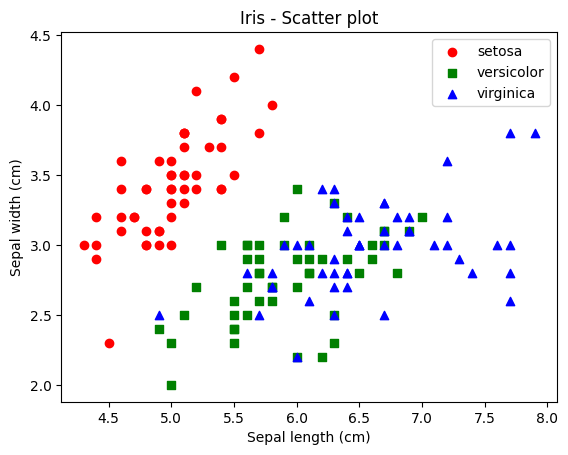

In [41]:
plt.figure()

colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']

for i in range(3):
    subset = df[df["species"] == i]
    plt.scatter(
        subset["sepal length (cm)"],
        subset["sepal width (cm)"],
        c=colors[i],
        marker=markers[i],
        label=iris.target_names[i]
    )

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.title("Iris - Scatter plot")
plt.show()


In [42]:
print("Minimum:")
print(df.iloc[:, :-1].min())

print("\nMaksimum:")
print(df.iloc[:, :-1].max())

print("\nOdchylenie standardowe:")
print(df.iloc[:, :-1].std())


Minimum:
sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

Maksimum:
sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

Odchylenie standardowe:
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


In [43]:
corr = df.iloc[:, :-1].corr()

print("Macierz korelacji:")
print(corr)


Macierz korelacji:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


In [44]:
X = df[["sepal length (cm)", "sepal width (cm)"]]

kmeans = KMeans(n_clusters=3, random_state=42)
df["kmeans_cluster"] = kmeans.fit_predict(X)


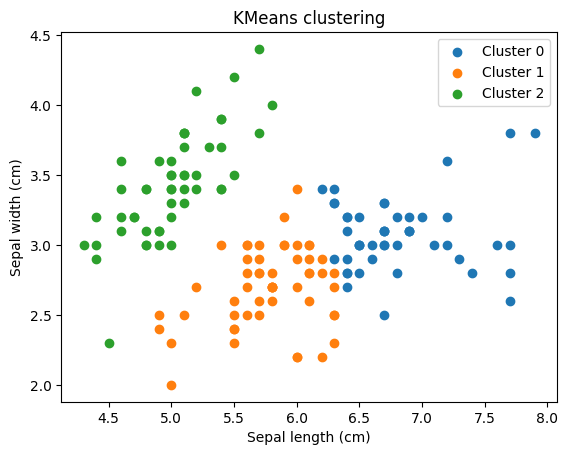

In [45]:
plt.figure()

for i in range(3):
    subset = df[df["kmeans_cluster"] == i]
    plt.scatter(
        subset["sepal length (cm)"],
        subset["sepal width (cm)"],
        label=f"Cluster {i}"
    )

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.title("KMeans clustering")
plt.show()


In [46]:
agglo = AgglomerativeClustering(n_clusters=3)
df["agglo_cluster"] = agglo.fit_predict(X)


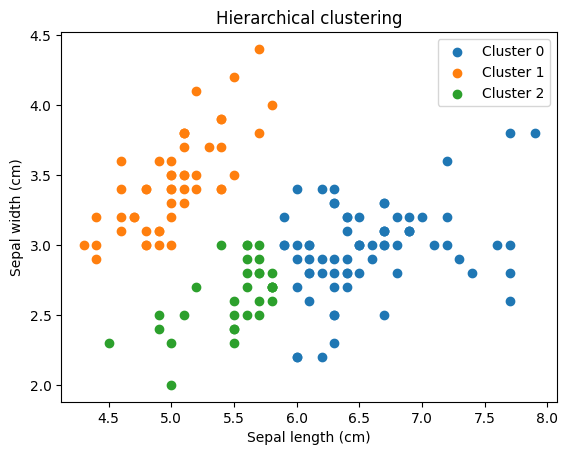

In [47]:
plt.figure()

for i in range(3):
    subset = df[df["agglo_cluster"] == i]
    plt.scatter(
        subset["sepal length (cm)"],
        subset["sepal width (cm)"],
        label=f"Cluster {i}"
    )

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.title("Hierarchical clustering")
plt.show()


## Zadanie 4
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [53]:
import pandas as pd

# Wczytanie danych
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Podstawowe informacje
print(penguins.info())
print(penguins.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550

In [55]:

print(penguins.isnull().sum())
penguins_clean = penguins.dropna()
print(penguins_clean.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [56]:
X = penguins_clean[['bill_length_mm', 'flipper_length_mm']]


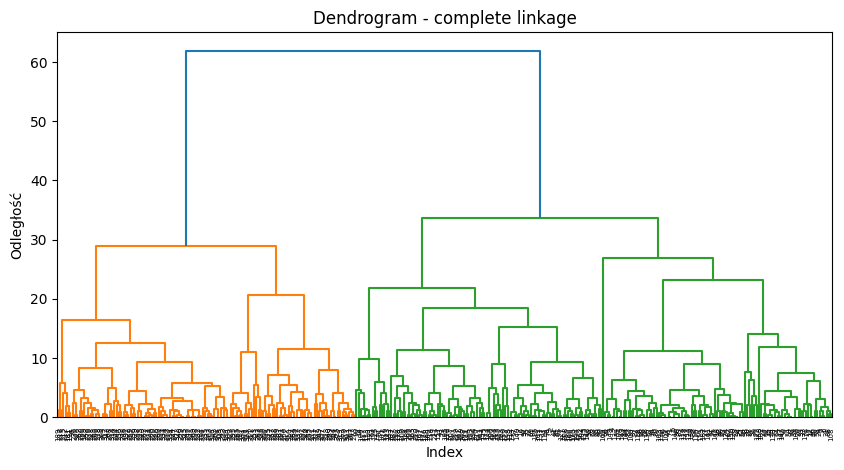

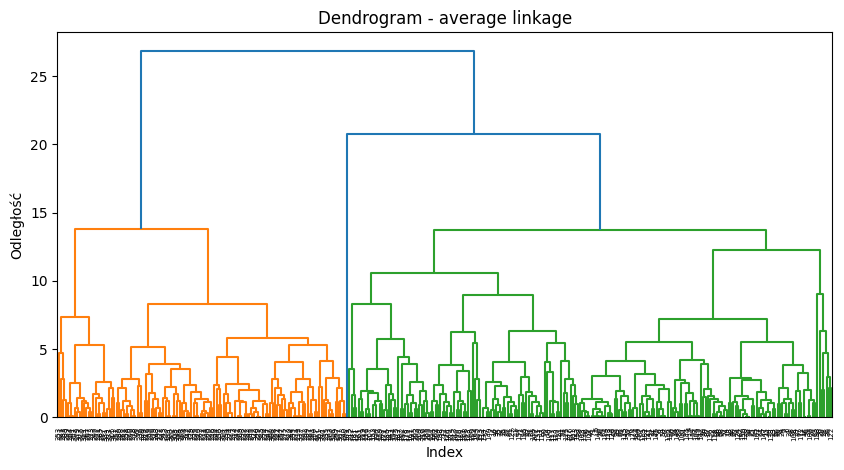

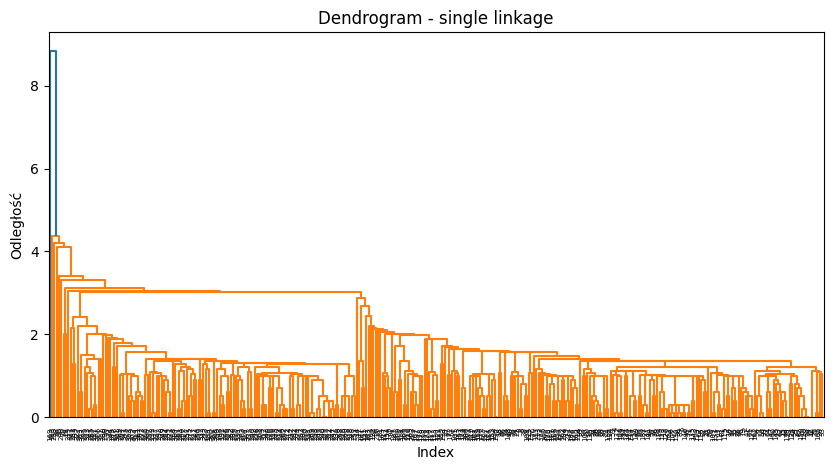

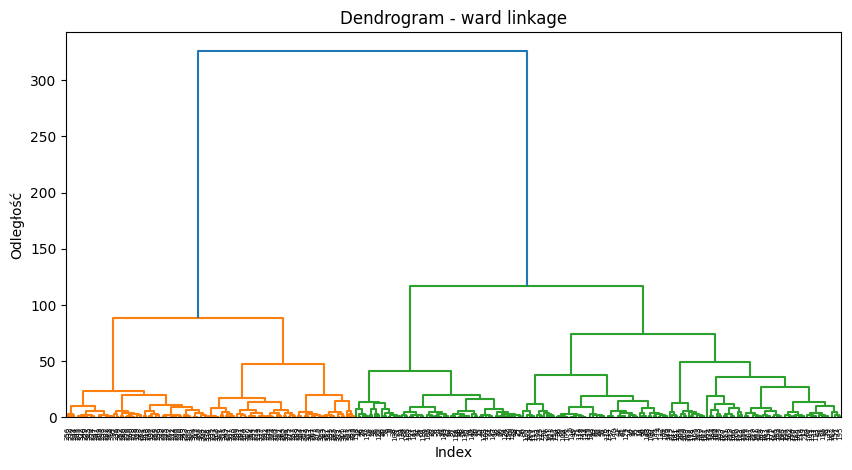

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Różne metody linkage
linkage_methods = ['complete', 'average', 'single', 'ward']

for method in linkage_methods:
    linked = linkage(X, method=method)
    
    plt.figure(figsize=(10, 5))
    dendrogram(linked, labels=penguins_clean.index, leaf_rotation=90)
    plt.title(f"Dendrogram - {method} linkage")
    plt.xlabel("Index")
    plt.ylabel("Odległość")
    plt.show()



In [59]:
X = penguins_clean[['bill_length_mm', 'flipper_length_mm']].copy()

from scipy.cluster.hierarchy import linkage, fcluster

linked = linkage(X, method='ward')
clusters = fcluster(linked, t=3, criterion='maxclust')
X['cluster'] = clusters


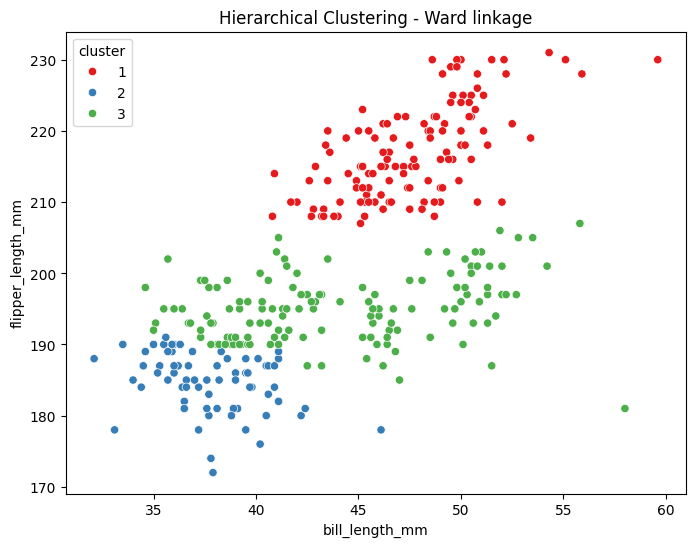

In [60]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='cluster', palette='Set1', data=X)
plt.title("Hierarchical Clustering - Ward linkage")
plt.show()